In [1]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [3]:
!pip install paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [6]:
from google.colab import files
uploaded = files.upload()

Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg
Saving img3.jpg to img3.jpg
Saving img4.jpg to img4.jpg
Saving img5.jpg to img5.jpg


In [13]:
import numpy as np
from paddleocr import PaddleOCR
from PIL import Image
import base64
from io import BytesIO
from datetime import datetime

ocr = PaddleOCR(use_textline_orientation = True, lang = 'en')

mock_db = {
    "documents": [],
    "ocr_lines": []
}

image_files = [f"img{i}.jpg" for i in range(1, 6)]

for img_file in image_files:
    try:
        img = Image.open(img_file).convert("RGB")
        img_np = np.array(img)
        buffered = BytesIO()
        img.save(buffered, format="JPEG")
        img_b64 = base64.b64encode(buffered.getvalue()).decode()

        ocr_result = ocr.predict(img_np)[0]
        boxes = ocr_result['rec_polys']
        texts = ocr_result['rec_texts']
        confidences = ocr_result['rec_scores']

        mock_db["documents"].append({
            "doc_name": img_file,
            "upload_date": datetime.utcnow().isoformat(),
            "image_data": img_b64,
            "ocr_processed": True
        })

        for i, (text, conf, box) in enumerate(zip(texts, confidences, boxes), start=1):
            mock_db["ocr_lines"].append({
                "doc_name": img_file,
                "line_number": i,
                "text": text,
                "confidence": float(conf),
                "bbox": box
            })

        print(f"Processed {img_file} — {len(texts)} lines extracted.")

    except Exception as e:
        print(f"Failed to process {img_file}: {e}")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Processed img1.jpg — 43 lines extracted.
Processed img2.jpg — 46 lines extracted.
Processed img3.jpg — 49 lines extracted.
Processed img4.jpg — 57 lines extracted.
Processed img5.jpg — 52 lines extracted.


In [37]:
from IPython.display import Image, display

def search_query(user_query):
    results = [
        {
            "doc_name": line["doc_name"],
            "line_number": line["line_number"],
            "text": line["text"],
            "confidence": line["confidence"]
        }
        for line in mock_db["ocr_lines"]
        if user_query.lower() in line["text"].lower()
    ]

    print(f"\nSearch results for: '{user_query}'")
    if results:
      for res in results:
          print(f"{res['doc_name']} | Line {res['line_number']} | Confidence: {res['confidence']:.2f}\n{res['text']}\n")
          if res['doc_name']:
              display(Image(filename=res['doc_name'], width=200))
    else:
        print("No matches found.")


In [20]:
mock_db

{'documents': [{'doc_name': 'img1.jpg',
   'upload_date': '2025-06-24T07:58:27.866304',
   'image_data': '/9j/4AAQSkZJRgABAQAAAQABAAD//gAeUEZVIFNjYW5TbmFwIE1hbmFnZXIgI2lYNTAwAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/AABEIA/UBzwMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/APfFZW6EH6U+qtpxaxseMq


Search results for: 'handkerchief'
img5.jpg | Line 29 | Confidence: 0.99
HANDKERCHIEF71386#2PCS



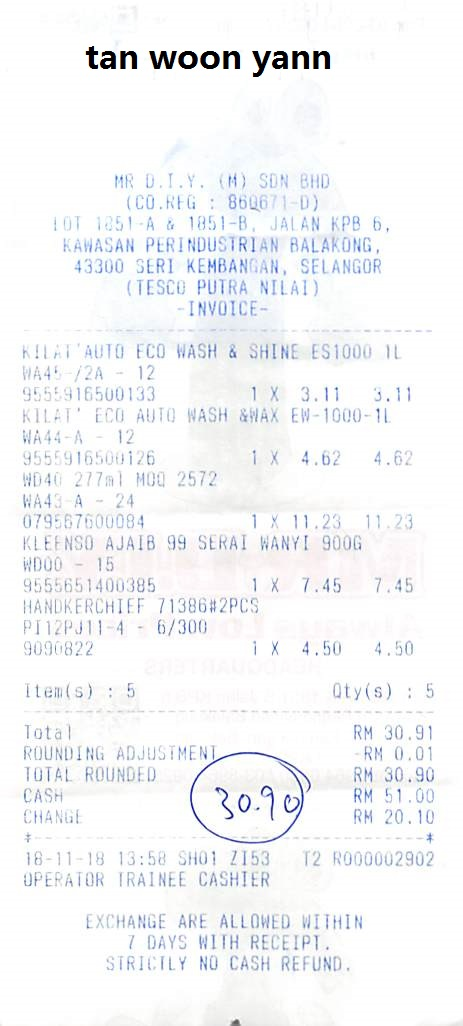

In [39]:
search_query("handkerchief")